In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.interpolate import CubicSpline
from scipy.stats import normaltest
import numpy as np
import matplotlib
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import matplotlib
from math import isnan

# Đọc dữ liệu

In [3]:
# df: dataFrame read from files
df = pd.read_csv('../dataset/data1.csv')

In [4]:
df.head()

,Date,Season,Vụ nuôi,module_name,ao,Ngày thả,Time,Nhiệt độ,pH,Độ mặn,...,Loại ao,Công nghệ nuôi,Giai doan,area,Giống tôm,Số lượng post,Tuổi tôm,Con/Kg,Mực nước,Thay nước (cm)
0,21/6/2022,Rainy,Vụ 1-2022,A1,D3N6,69,8,29.53,7.33,21.53,...,Rectangle,Nuôi 1,NaN,1785.0,Vietuc,321750.0,78.00,55.00,75.0,0.0
1,20/6/2022,Rainy,Vụ 1-2022,A1,D3N6,68,8,29.65,7.40,21.34,...,Rectangle,Nuôi 1,NaN,1785.0,Vietuc,NaN,79.00,NaN,60.0,0.0
2,19/6/2022,Rainy,Vụ 1-2022,A1,D3N6,67,8,29.51,7.44,21.18,...,Rectangle,Nuôi 1,NaN,1785.0,Vietuc,NaN,76.00,NaN,61.0,0.0
3,18/6/2022,Rainy,Vụ 1-2022,A1,D3N6,66,8,30.51,7.50,21.54,...,Rectangle,Nuôi 1,NaN,1785.0,Vietuc,NaN,77.00,NaN,61.0,10.0
4,17/6/2022,Rainy,Vụ 1-2022,A1,D3N6,65,8,30.18,7.51,21.55,...,Rectangle,Nuôi 1,NaN,1785.0,Vietuc,NaN,74.00,NaN,60.0,0.0


In [5]:
df.columns

Index(['Date', 'Season', 'Vụ nuôi', 'module_name', 'ao', 'Ngày thả', 'Time',
       'Nhiệt độ', 'pH', 'Độ mặn', 'TDS', 'Độ đục', 'DO', 'Độ màu', 'Độ trong',
       'Độ kiềm', 'Độ cứng', 'Amoni', 'Nitrat', 'Nitrit', 'Phosphate (PO43-)',
       'Silica', 'Canxi', 'Kali', 'Magie', 'Nhiệt độ.1', 'pH.1', 'Độ mặn.1',
       'TDS.1', 'Độ đục.1', 'DO.1', 'Độ màu.1', 'Độ trong.1', 'Độ kiềm.1',
       'Độ cứng.1', 'Amoni.1', 'Nitrat.1', 'Nitrit.1', 'Phosphate (PO43-).1',
       'Silica.1', 'Canxi.1', 'Kali.1', 'Magie.1', 'F1', 'F2', 'F3', 'F4',
       'F5', 'WQI', 'Loại ao', 'Công nghệ nuôi', 'Giai doan', 'area',
       'Giống tôm', 'Số lượng post', 'Tuổi tôm', 'Con/Kg', 'Mực nước',
       'Thay nước (cm)'],
      dtype='object')

In [6]:
# df.describe()

In [7]:
na = df.isnull().sum()
pd.DataFrame(na[na>0],columns=['NaN'])

,NaN
Giai doan,1179
Số lượng post,1129
Con/Kg,1067
Mực nước,7
Thay nước (cm),1


In [8]:
columns = ['Date','Season', 'Vụ nuôi', 'module_name', 'ao', 'Ngày thả', 'Time','Nhiệt độ', 'pH', 'Độ mặn', 'TDS', 'Độ đục', 'DO', 'Độ màu', 'Độ trong',
       'Độ kiềm', 'Độ cứng', 'Amoni', 'Nitrat', 'Nitrit', 'Phosphate (PO43-)',
       'Silica', 'Canxi', 'Kali', 'Magie', 'Loại ao', 'Công nghệ nuôi', 'Giai doan', 'area',
       'Giống tôm', 'Số lượng post','Tuổi tôm', 'Con/Kg', 'Mực nước',
       'Thay nước (cm)','WQI']

In [9]:
numeric_columns = ['Nhiệt độ', 'pH', 'Độ mặn', 'TDS', 'Độ đục', 'DO', 'Độ màu', 'Độ trong',
       'Độ kiềm', 'Độ cứng', 'Amoni', 'Nitrat', 'Nitrit', 'Phosphate (PO43-)',
       'Silica', 'Canxi', 'Kali', 'Magie', 'Tuổi tôm', 'Mực nước',
       'Thay nước (cm)','WQI']

In [10]:
# df1: dataframe with only specified columns 
df1 = df[columns].copy()

In [11]:
df1.head()

,Date,Season,Vụ nuôi,module_name,ao,Ngày thả,Time,Nhiệt độ,pH,Độ mặn,...,Công nghệ nuôi,Giai doan,area,Giống tôm,Số lượng post,Tuổi tôm,Con/Kg,Mực nước,Thay nước (cm),WQI
0,21/6/2022,Rainy,Vụ 1-2022,A1,D3N6,69,8,29.53,7.33,21.53,...,Nuôi 1,NaN,1785.0,Vietuc,321750.0,78.00,55.00,75.0,0.0,0.64
1,20/6/2022,Rainy,Vụ 1-2022,A1,D3N6,68,8,29.65,7.40,21.34,...,Nuôi 1,NaN,1785.0,Vietuc,NaN,79.00,NaN,60.0,0.0,0.64
2,19/6/2022,Rainy,Vụ 1-2022,A1,D3N6,67,8,29.51,7.44,21.18,...,Nuôi 1,NaN,1785.0,Vietuc,NaN,76.00,NaN,61.0,0.0,0.66
3,18/6/2022,Rainy,Vụ 1-2022,A1,D3N6,66,8,30.51,7.50,21.54,...,Nuôi 1,NaN,1785.0,Vietuc,NaN,77.00,NaN,61.0,10.0,0.65
4,17/6/2022,Rainy,Vụ 1-2022,A1,D3N6,65,8,30.18,7.51,21.55,...,Nuôi 1,NaN,1785.0,Vietuc,NaN,74.00,NaN,60.0,0.0,0.63


In [12]:
# convert to numeric, other to NaN
df1[numeric_columns] = df1[numeric_columns].apply(lambda s: pd.to_numeric(s, errors='coerce'))

In [13]:
df1.head()

,Date,Season,Vụ nuôi,module_name,ao,Ngày thả,Time,Nhiệt độ,pH,Độ mặn,...,Công nghệ nuôi,Giai doan,area,Giống tôm,Số lượng post,Tuổi tôm,Con/Kg,Mực nước,Thay nước (cm),WQI
0,21/6/2022,Rainy,Vụ 1-2022,A1,D3N6,69,8,29.53,7.33,21.53,...,Nuôi 1,NaN,1785.0,Vietuc,321750.0,78.0,55.00,75.0,0.0,0.64
1,20/6/2022,Rainy,Vụ 1-2022,A1,D3N6,68,8,29.65,7.40,21.34,...,Nuôi 1,NaN,1785.0,Vietuc,NaN,79.0,NaN,60.0,0.0,0.64
2,19/6/2022,Rainy,Vụ 1-2022,A1,D3N6,67,8,29.51,7.44,21.18,...,Nuôi 1,NaN,1785.0,Vietuc,NaN,76.0,NaN,61.0,0.0,0.66
3,18/6/2022,Rainy,Vụ 1-2022,A1,D3N6,66,8,30.51,7.50,21.54,...,Nuôi 1,NaN,1785.0,Vietuc,NaN,77.0,NaN,61.0,10.0,0.65
4,17/6/2022,Rainy,Vụ 1-2022,A1,D3N6,65,8,30.18,7.51,21.55,...,Nuôi 1,NaN,1785.0,Vietuc,NaN,74.0,NaN,60.0,0.0,0.63


In [14]:
df1['Date'] = pd.to_datetime(df1['Date'],format="%d/%m/%Y")

In [15]:
na = df1.isnull().sum()
pd.DataFrame(na[na>0],columns=['NaN'])

,NaN
Giai doan,1179
Số lượng post,1129
Tuổi tôm,12
Con/Kg,1067
Mực nước,7
Thay nước (cm),1


In [16]:
# df2: drop all NaN values
df2 = df1.drop(columns=['Số lượng post','Giai doan'])

In [17]:
# With collumn is not numeric
# notnum_columns = df2.apply(lambda s: pd.to_numeric(s, errors='coerce').notnull().all())


In [18]:
df2.dropna(subset=numeric_columns,inplace=True)

In [19]:
df2.shape

(1160, 34)

## Vẽ distribution của các trường dữ liệu

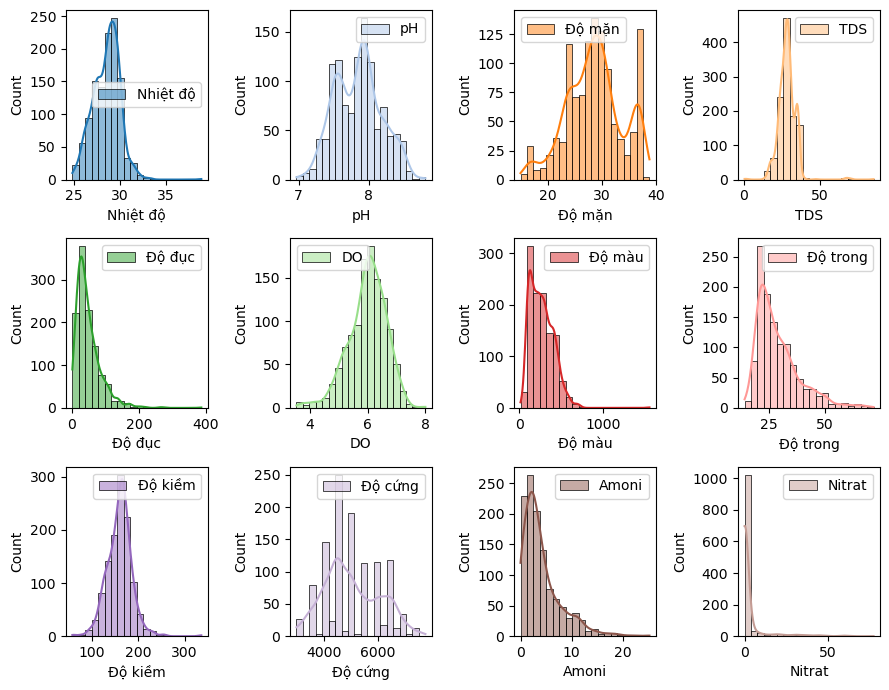

In [20]:
col = numeric_columns[:12]

fig = plt.figure(figsize=(9,7))

for p in range(0,12):
    plt.subplot(3,4,p+1)
    ax = sns.histplot(df2[col[p]],
                      kde=True,
                      bins=20,
                      color=matplotlib.cm.tab20.colors[p],
                      label=col[p])
    plt.legend()
plt.tight_layout()
plt.show()

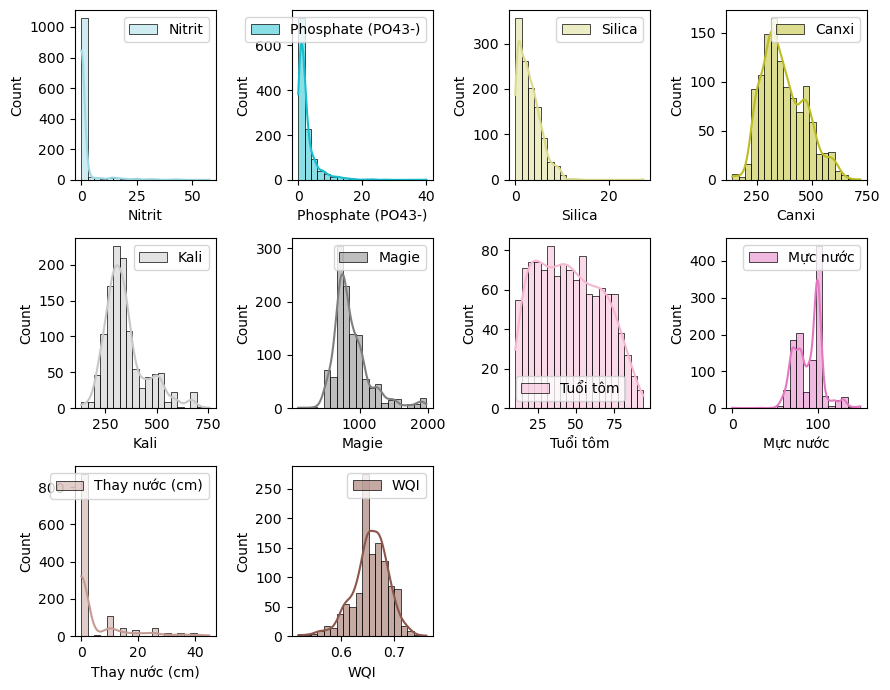

In [21]:
col = numeric_columns[12:]

fig = plt.figure(figsize=(9,7))

for p in range(0,10):
    plt.subplot(3,4,p+1)
    ax = sns.histplot(df2[col[p]],
                      kde=True,
                      bins=20,
                      color=matplotlib.cm.tab20_r.colors[p],
                      label=col[p])
    plt.legend()
plt.tight_layout()
plt.show()

---
Nhận xét:
 - Một số trường dữ liệu có 2 đỉnh: `pH, Độ mặn, TDS, Độ cứng, Canxi, Kali, Magie, Mực nước`
 
---

# Đánh giá dữ liệu theo thời gian

In [22]:
bins = (df1.Date.max()-df1.Date.min()).days

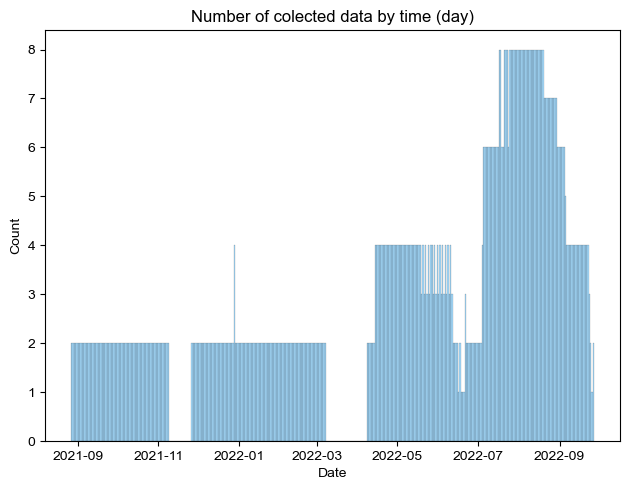

In [23]:
sns.histplot(df2['Date'],
             bins=bins,
             color='lightskyblue')
sns.set_style('whitegrid')
plt.tight_layout()
plt.title("Number of colected data by time (day)")
plt.show()

---
* Dữ liệu thu thập không đều theo thời gian

---

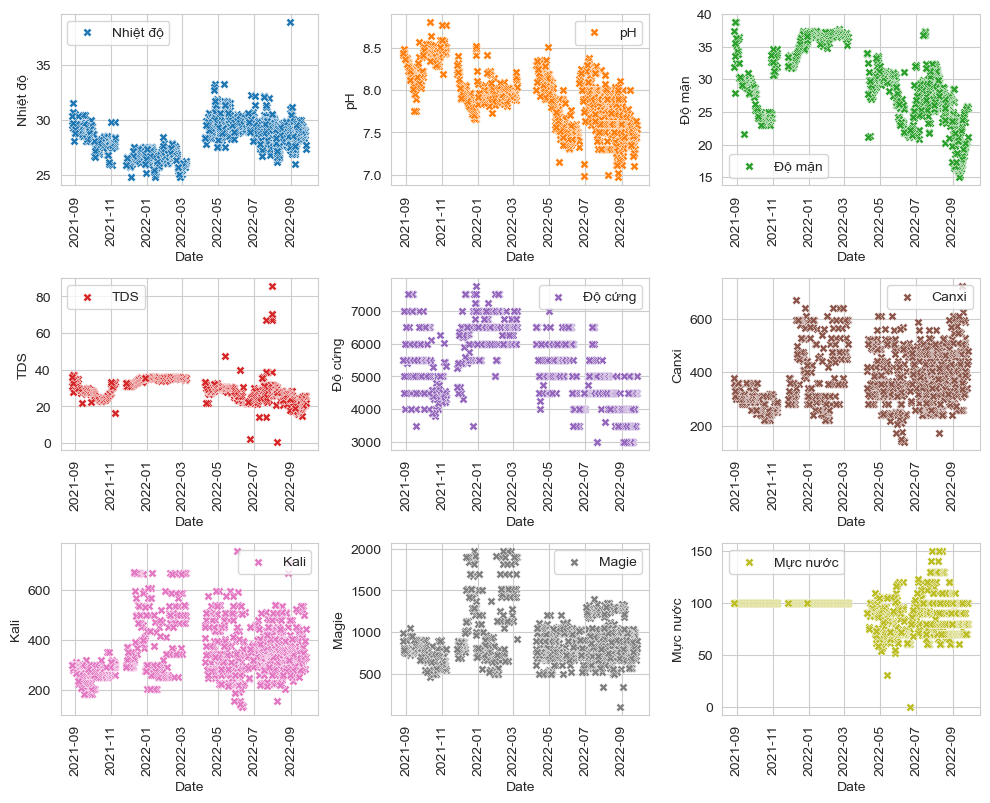

In [24]:
cols = ['Nhiệt độ','pH', 'Độ mặn', 'TDS', 'Độ cứng', 'Canxi', 'Kali', 'Magie', 'Mực nước']
fig = plt.figure(figsize=(10,10))
sns.set_style('whitegrid')

for i,col in enumerate(cols):
    plt.subplot(len(cols)//3+1,3,i+1)
    sns.scatterplot(df2[['Date',col]],
                    x='Date',
                    color=matplotlib.cm.tab10.colors[i],
                    y=col,
                    label=col,
                    marker='X',
                    linewidth=0.3,
                    )
    ax = plt.gca()
    xticklabels = ax.get_xticklabels()
    
    ax.set_xticks(ax.get_xticks().tolist())
    ax.set_xticklabels(xticklabels,rotation=90)
    
plt.legend()
plt.tight_layout()
plt.show()

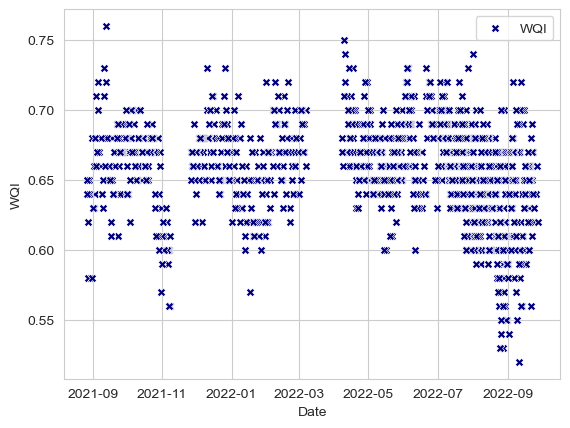

In [25]:
sns.scatterplot(df2,x='Date',y='WQI',
                color='navy',
                marker='X',
                label='WQI')
plt.legend()
plt.show()

<Axes: xlabel='Thay nước (cm)', ylabel='WQI'>

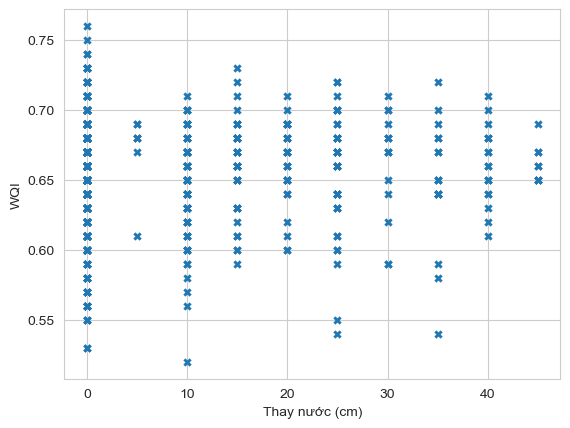

In [26]:
sns.scatterplot(df2,x='Thay nước (cm)',y='WQI',\
                linewidth=0,
                marker='X')

<Axes: xlabel='Date', ylabel='module_name'>

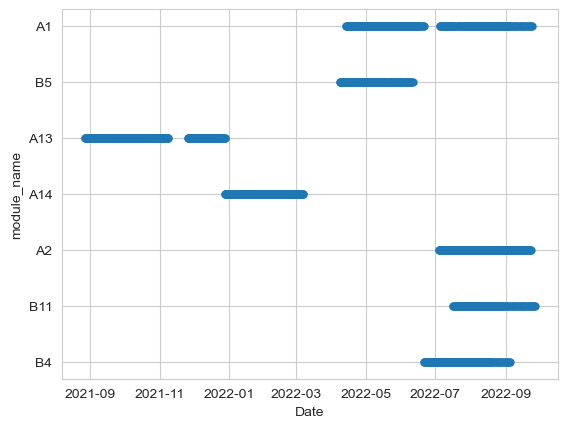

In [27]:
sns.scatterplot(df2,x='Date',y='module_name',\
                linewidth=0)

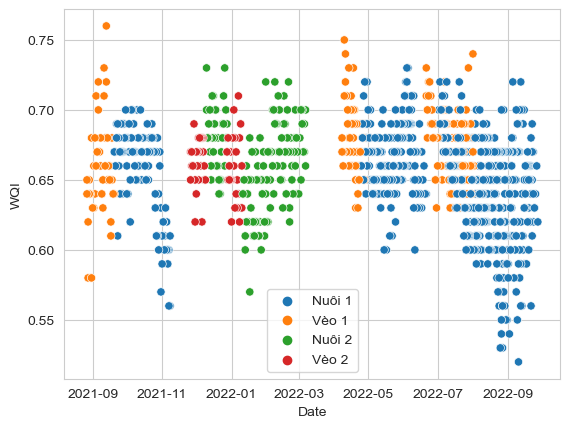

In [28]:
sns.scatterplot(df2,x='Date',y='WQI',
                color='navy',
                hue="Công nghệ nuôi",
                )
plt.legend()
plt.show()

### Tuổi tôm, Size 

In [29]:
df2['unit'] = df2[['Vụ nuôi','module_name','ao']].apply(lambda x: f"{x['Vụ nuôi']}-{x.module_name}-{x['ao']}", axis=1)

In [30]:
units = list(df2['unit'].unique())

In [201]:
units

['Vụ 1-2022-A1-D3N6',
 'Vụ 1-2022-A1-D5N9',
 'Vụ 1-2022-B5-D1N6',
 'Vụ 1-2022-B5-D4N9',
 'Vụ 2-2021-A13-D5N9',
 'Vụ 2-2021-A13-D6N13',
 'Vụ 3-2021-A13-A13N1',
 'Vụ 3-2021-A13-A13N5',
 'Vụ 3-2021-A14-A14N13',
 'Vụ 3-2021-A14-A14N9',
 'Vụ 2-2022-A1-D5N9',
 'Vụ 2-2022-A1-D4N7',
 'Vụ 2-2022-A2-D4N9',
 'Vụ 2-2022-A2-D5N10',
 'Vụ 2-2022-B11-D4N4',
 'Vụ 2-2022-B11-D5N5',
 'Vụ 2-2022-B4-D3N5',
 'Vụ 2-2022-B4-D5N9']

In [32]:
df2['Con/Kg'] = df2['Con/Kg'].astype(float)

<Axes: xlabel='Tuổi tôm', ylabel='Con/Kg'>

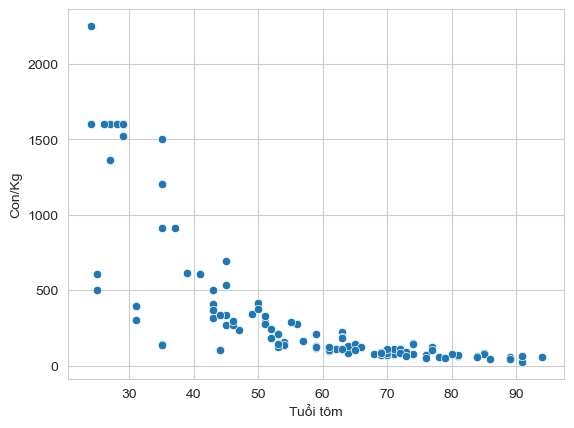

In [33]:
sns.scatterplot(df2[['Tuổi tôm', 'Con/Kg']],x='Tuổi tôm',y='Con/Kg')

In [34]:
# df2[df2['unit']=='A1D3N6']

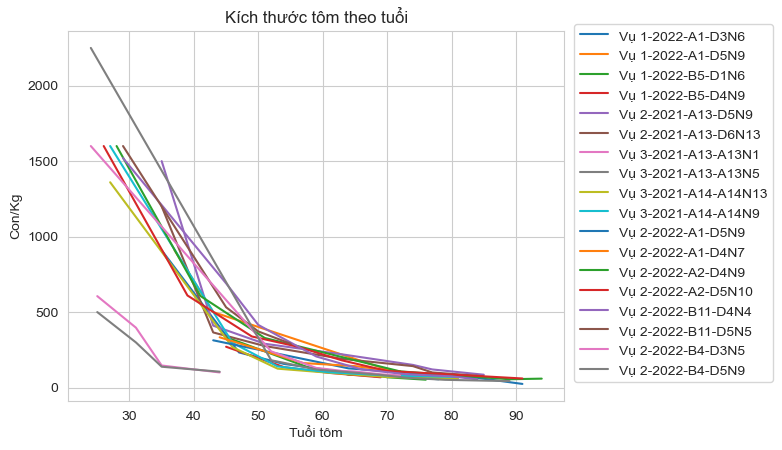

In [35]:
fig = plt.figure()
for unit in units:
    
    sns.lineplot(df2[df2['unit']==unit],x='Tuổi tôm',y='Con/Kg',label=unit)
plt.legend(loc=[1.02,0.05])
plt.title("Kích thước tôm theo tuổi")
plt.show()

In [36]:
# df2[df2['unit']=='Vụ 1-2022-A1-D3N6'][['Tuổi tôm', 'Con/Kg']].dropna().sort_values('Tuổi tôm')

In [37]:
# spl = CubicSpline(df2[df2['unit']=='A1D3N6'][['Tuổi tôm', 'Con/Kg']].dropna()[::-1]['Tuổi tôm'],
#             df2[df2['unit']=='A1D3N6'][['Tuổi tôm', 'Con/Kg']].dropna()[::-1]['Con/Kg'])

In [38]:
spl_dict = dict()

for unit in units:
    # select data for spline 
    df_temp = df2[df2['unit']==unit][['Tuổi tôm', 'Con/Kg']].dropna().sort_values('Tuổi tôm')
    spl = CubicSpline(df_temp['Tuổi tôm'],
                      df_temp['Con/Kg'])
    spl_dict[unit] = spl
    
df2['size'] = df2.apply(lambda x: float(spl_dict[x['unit']](x['Tuổi tôm'])) if isnan(x['Con/Kg']) else float(x['Con/Kg']), axis=1)

In [39]:
# df2.head()

In [40]:
# df2['size'] = df2.apply(lambda x: spl_dict[x['unit']](x['Tuổi tôm']) if isnan(x['Con/Kg']) else x['Con/Kg'], axis=1)


In [41]:
df2['size']

0         55.000000
1         45.260686
2         67.452753
3         62.280073
4         72.883335
           ...     
1174    3604.250040
1175    3835.691477
1176    4077.292710
1177    4329.275577
1178    4591.861914
Name: size, Length: 1160, dtype: float64

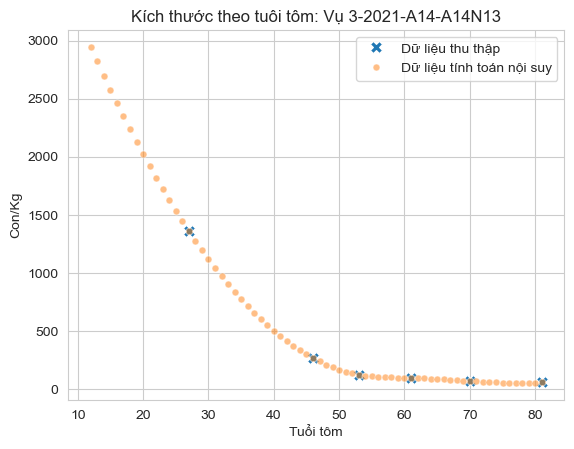

In [211]:
unit = 'Vụ 3-2021-A14-A14N13'
ax1 = sns.lineplot(df2[df2['unit']==unit],
             x='Tuổi tôm',y='Con/Kg',
             label="Dữ liệu thu thập",
             ls="",
             marker='X',ms=8)
ax2 = sns.lineplot(df2[df2['unit']==unit],
             x='Tuổi tôm',y='size',
             label="Dữ liệu tính toán nội suy",
             ls="",
             marker='o',ms=5,
             alpha=0.5)
plt.title(f"Kích thước theo tuôi tôm: {unit}")
plt.show()

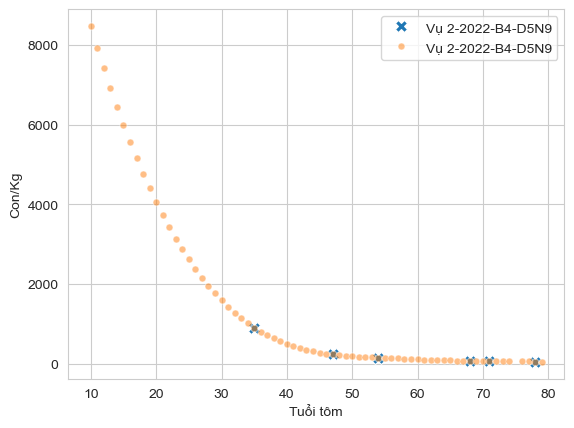

In [42]:
sns.lineplot(df2[df2['unit']=='Vụ 1-2022-A1-D3N6'],
             x='Tuổi tôm',y='Con/Kg',label=unit,ls="",
             marker='X',ms=8)
sns.lineplot(df2[df2['unit']=='Vụ 1-2022-A1-D3N6'],
             x='Tuổi tôm',y='size',
             label=unit,ls="",
             marker='o',ms=5,
             alpha=0.5)

# sns.lineplot(df2[df2['unit']=='Vụ 1-2022-A1-D3N6'],x='Tuổi tôm',y='size',label=unit,ls="",marker='o')
# plt.plot(np.arange(30,80,1),spl(np.arange(30,80,1)))

plt.show()

In [124]:
df2.sort_values(['unit','Tuổi tôm'],inplace=True)

In [135]:
df2.reset_index(drop=True,inplace=True)

In [136]:
df2.head()

,Date,Season,Vụ nuôi,module_name,ao,Ngày thả,Time,Nhiệt độ,pH,Độ mặn,TDS,Độ đục,DO,Độ màu,Độ trong,Độ kiềm,Độ cứng,Amoni,Nitrat,Nitrit,Phosphate (PO43-),Silica,Canxi,Kali,Magie,Loại ao,Công nghệ nuôi,area,Giống tôm,Tuổi tôm,Con/Kg,Mực nước,Thay nước (cm),WQI,unit,size
0,2022-04-14,Dry,Vụ 1-2022,A1,D3N6,1,8,30.28,8.24,27.44,27.30,45.14,6.08,193.0,23.0,179.0,6000.0,0.94,0.0,0.0,1.37,3.95,506.20,509.00,1050.00,Rectangle,Vèo 1,232.0,Vietuc,10.0,NaN,100.0,0.0,0.73,Vụ 1-2022-A1-D3N6,8481.906322
1,2022-04-15,Dry,Vụ 1-2022,A1,D3N6,2,8,28.76,8.36,28.04,27.85,20.26,6.48,108.0,23.0,167.0,4000.0,0.54,0.0,0.0,0.22,4.85,323.50,287.00,1018.00,Rectangle,Vèo 1,232.0,Vietuc,11.0,NaN,100.0,0.0,0.66,Vụ 1-2022-A1-D3N6,7935.238874
2,2022-04-16,Dry,Vụ 1-2022,A1,D3N6,3,8,30.64,8.35,27.17,27.83,50.78,6.19,137.0,24.0,190.0,5500.0,0.64,0.0,0.0,2.45,4.00,319.00,266.00,959.75,Rectangle,Vèo 1,232.0,Vietuc,12.0,NaN,100.0,0.0,0.69,Vụ 1-2022-A1-D3N6,7413.348035
3,2022-04-17,Dry,Vụ 1-2022,A1,D3N6,4,8,29.02,8.30,28.00,27.81,34.36,6.33,198.0,24.0,181.0,5000.0,0.64,0.0,0.0,2.40,0.85,340.25,296.75,1049.25,Rectangle,Vèo 1,232.0,Vietuc,13.0,NaN,100.0,0.0,0.69,Vụ 1-2022-A1-D3N6,6915.651581
4,2022-04-18,Dry,Vụ 1-2022,A1,D3N6,5,8,28.79,8.28,28.23,28.02,35.12,6.29,377.0,24.0,229.0,5500.0,3.16,0.0,0.0,0.99,1.80,486.25,534.75,980.00,Rectangle,Vèo 1,232.0,Vietuc,14.0,NaN,100.0,0.0,0.73,Vụ 1-2022-A1-D3N6,6441.567290


In [202]:
# def sizediffCal(row):
#     i = row.name


In [203]:
# df2.apply(lambda x: sizediffCal(x),axis=1)

In [179]:
df2['sizediff'] = None

In [204]:
for unit in units:
    df2.loc[df2['unit']==unit,'sizediff'] = df2[df2['unit']==unit]['size'].shift(periods=-1)-df2[df2['unit']==unit]['size']

In [205]:
df2.head()

,Date,Season,Vụ nuôi,module_name,ao,Ngày thả,Time,Nhiệt độ,pH,Độ mặn,TDS,Độ đục,DO,Độ màu,Độ trong,Độ kiềm,Độ cứng,Amoni,Nitrat,Nitrit,Phosphate (PO43-),Silica,Canxi,Kali,Magie,Loại ao,Công nghệ nuôi,area,Giống tôm,Tuổi tôm,Con/Kg,Mực nước,Thay nước (cm),WQI,unit,size,sizediff
0,2022-04-14,Dry,Vụ 1-2022,A1,D3N6,1,8,30.28,8.24,27.44,27.30,45.14,6.08,193.0,23.0,179.0,6000.0,0.94,0.0,0.0,1.37,3.95,506.20,509.00,1050.00,Rectangle,Vèo 1,232.0,Vietuc,10.0,NaN,100.0,0.0,0.73,Vụ 1-2022-A1-D3N6,8481.906322,-546.667448
1,2022-04-15,Dry,Vụ 1-2022,A1,D3N6,2,8,28.76,8.36,28.04,27.85,20.26,6.48,108.0,23.0,167.0,4000.0,0.54,0.0,0.0,0.22,4.85,323.50,287.00,1018.00,Rectangle,Vèo 1,232.0,Vietuc,11.0,NaN,100.0,0.0,0.66,Vụ 1-2022-A1-D3N6,7935.238874,-521.890839
2,2022-04-16,Dry,Vụ 1-2022,A1,D3N6,3,8,30.64,8.35,27.17,27.83,50.78,6.19,137.0,24.0,190.0,5500.0,0.64,0.0,0.0,2.45,4.00,319.00,266.00,959.75,Rectangle,Vèo 1,232.0,Vietuc,12.0,NaN,100.0,0.0,0.69,Vụ 1-2022-A1-D3N6,7413.348035,-497.696454
3,2022-04-17,Dry,Vụ 1-2022,A1,D3N6,4,8,29.02,8.30,28.00,27.81,34.36,6.33,198.0,24.0,181.0,5000.0,0.64,0.0,0.0,2.40,0.85,340.25,296.75,1049.25,Rectangle,Vèo 1,232.0,Vietuc,13.0,NaN,100.0,0.0,0.69,Vụ 1-2022-A1-D3N6,6915.651581,-474.084291
4,2022-04-18,Dry,Vụ 1-2022,A1,D3N6,5,8,28.79,8.28,28.23,28.02,35.12,6.29,377.0,24.0,229.0,5500.0,3.16,0.0,0.0,0.99,1.80,486.25,534.75,980.00,Rectangle,Vèo 1,232.0,Vietuc,14.0,NaN,100.0,0.0,0.73,Vụ 1-2022-A1-D3N6,6441.567290,-451.054351


In [210]:
df2[df2['sizediff']>0]['unit'].unique()

array(['Vụ 1-2022-A1-D3N6', 'Vụ 1-2022-A1-D5N9', 'Vụ 1-2022-B5-D1N6',
       'Vụ 2-2021-A13-D5N9', 'Vụ 2-2021-A13-D6N13', 'Vụ 2-2022-A2-D4N9',
       'Vụ 2-2022-A2-D5N10', 'Vụ 2-2022-B11-D4N4', 'Vụ 3-2021-A13-A13N1',
       'Vụ 3-2021-A13-A13N5', 'Vụ 3-2021-A14-A14N13',
       'Vụ 3-2021-A14-A14N9'], dtype=object)

<Axes: xlabel='Tuổi tôm', ylabel='sizediff'>

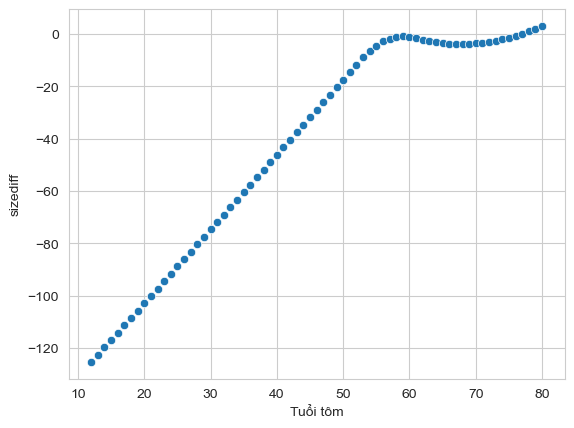

In [215]:
unit = 'Vụ 3-2021-A14-A14N13'
sns.scatterplot(df2[df2['unit']==unit],x="Tuổi tôm",y="sizediff")

In [228]:
df2 = df2.rename(columns={'Amoni':'TAN'})

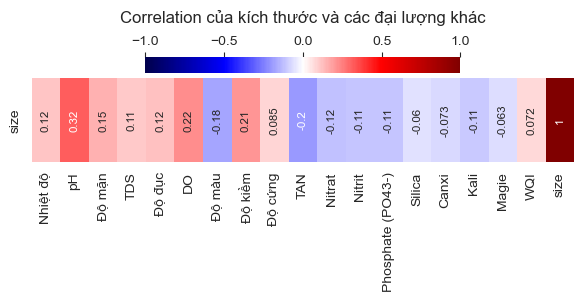

In [283]:
fig = plt.figure(figsize=(7,3))
ax2 = fig.add_subplot(2,1,2)
ax1 = sns.heatmap(df2[cols+['size']].corr().loc[['size',]],
            cbar_kws={'location':'top'},
            cmap='seismic',
            vmax=1,
            vmin=-1,
            annot=True,
            annot_kws={'fontsize':'small',
                        'rotation':'vertical'})

plt.title("Correlation của kích thước và các đại lượng khác",
           pad=40)
# plt.tight_layout()
plt.show()

In [285]:
# cols = [
#        'Nhiệt độ', 'pH', 'Độ mặn', 'TDS', 'Độ đục', 'DO', 'Độ màu',
#        'Độ kiềm', 'Độ cứng', 'TAN', 'Nitrat', 'Nitrit', 'Phosphate (PO43-)',
#        'Silica', 'Canxi', 'Kali', 'Magie', 'WQI'
# ]
# fig = plt.figure(figsize=(8,5))
# sns.heatmap(df2[cols+['size','sizediff']].corr()['size'],
#             cmap='seismic',
#             vmax=1,
#             vmin=-1,
#             annot=True,
#             annot_kws={'fontsize':'xx-small'})
# plt.show()

In [156]:

# sns.scatterplot(x=df2['Date'],y=df2['pH'],
#                 markers=True,
#                 label='pH',
#                 )
# sns.set_style('whitegrid')
# plt.legend()
# plt.show()

In [44]:
# sns.scatterplot(df2,x='Date',y='TDS',
#                 label='TDS')
# plt.legend()
# plt.show()

In [45]:
# sns.scatterplot(df2,x='Date',y='Độ mặn',
#                 label='Độ mặn')
# plt.legend()
# plt.show()

In [46]:
# sns.scatterplot(df2,x='Date',y='Nhiệt độ',
#                 label='Nhiệt độ')
# plt.legend()
# plt.show()

In [47]:
# sns.scatterplot(df2,x='Date',y='Độ kiềm',
#                 label='Độ kiềm')
# plt.legend()
# plt.show()

## Stardardize data

In [48]:
numeric_columns

['Nhiệt độ',
 'pH',
 'Độ mặn',
 'TDS',
 'Độ đục',
 'DO',
 'Độ màu',
 'Độ trong',
 'Độ kiềm',
 'Độ cứng',
 'Amoni',
 'Nitrat',
 'Nitrit',
 'Phosphate (PO43-)',
 'Silica',
 'Canxi',
 'Kali',
 'Magie',
 'Tuổi tôm',
 'Mực nước',
 'Thay nước (cm)',
 'WQI']

In [49]:
# scale data to mean = 0 and std = 1
# df3: data after scales
sc = StandardScaler()
df3 = pd.DataFrame(sc.fit_transform(df2[numeric_columns]),columns=numeric_columns)
df3.head()

,Nhiệt độ,pH,Độ mặn,TDS,Độ đục,DO,Độ màu,Độ trong,Độ kiềm,Độ cứng,...,Nitrit,Phosphate (PO43-),Silica,Canxi,Kali,Magie,Tuổi tôm,Mực nước,Thay nước (cm),WQI
0,0.674102,-1.580123,-1.407548,-1.177475,-0.242459,-2.189388,0.025815,-1.033398,-1.076009,-1.497003,...,-0.151973,1.485492,-0.484026,1.188386,0.257354,-0.345643,1.538450,-0.913770,-0.490731,-0.463615
1,0.756673,-1.367054,-1.445258,-1.177475,-0.278972,-1.461579,1.182790,-1.033398,-1.485173,-1.497003,...,-0.174778,0.033592,-0.484026,-0.449574,-0.588736,0.500332,1.585988,-1.829116,-0.490731,-0.463615
2,0.660340,-1.245300,-1.477013,-1.201625,-0.286221,-1.249301,1.218499,-1.033398,-1.522369,-1.008115,...,-0.190566,0.744727,-0.302787,1.395690,0.267308,0.071348,1.443376,-1.768093,-0.490731,0.133933
3,1.348435,-1.062669,-1.405564,-1.146425,-0.520339,-1.173488,1.418470,-1.033398,-1.633959,-1.008115,...,-0.227405,-0.410867,-0.022690,0.840320,0.088136,-0.707281,1.490913,-1.768093,0.513234,-0.164841
4,1.121363,-1.032231,-1.403579,-1.144699,-0.614577,-1.385765,1.204216,-0.929789,-1.745549,-1.497003,...,-0.201091,1.722537,2.506417,0.883828,-0.148271,-0.279220,1.348301,-1.829116,-0.490731,-0.762388


In [50]:
def normal_test(data: pd.DataFrame, col: str):
    # Get statistic of collumn
    mean = data[col].mean()
    std = data[col].std()
    median = data[col].median()
    x=np.arange(-5,5,0.01)

    ks_ret = stats.ks_1samp(data[col],stats.norm.cdf,args=(mean,std))

    print(f"KS-Test P-value 1 sample: {ks_ret.pvalue}")
    if ks_ret.pvalue < 0.05:
        print(f"P value < 0.05 => Non-Normal distribution")
    fig = plt.figure(figsize=(5,4))
    sns.histplot(data[col],
                 stat='density',
                 color=matplotlib.cm.tab10.colors[0])
    sns.kdeplot(data[col],
                color='navy',
                label=col)
    sns.lineplot(x=x,
                 y=stats.norm.pdf(x,loc=mean,scale=std),
                 color='red',
                 label='normal distribution')

    ax = plt.gca()
    ax.legend()
    plt.show()
    

KS-Test P-value 1 sample: 1.892070757114597e-21
P value < 0.05 => Non-Normal distribution


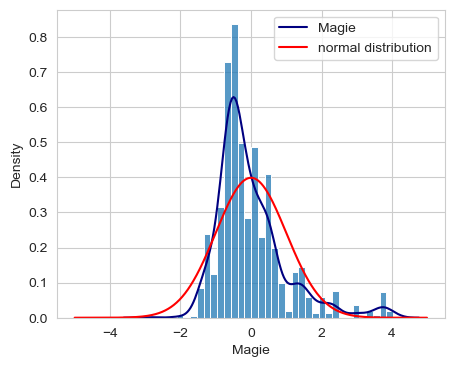

In [51]:
normal_test(df3,'Magie')

KS-Test P-value 1 sample: 1.7087595933719675e-09
P value < 0.05 => Non-Normal distribution


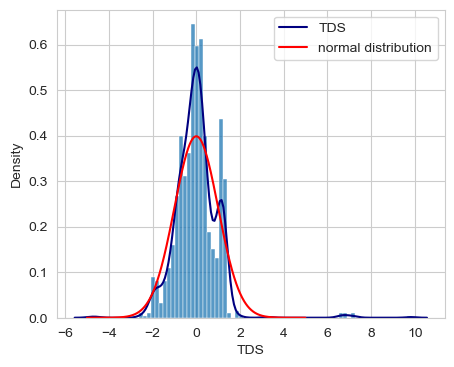

In [52]:
normal_test(df3,'TDS')

KS-Test P-value 1 sample: 2.3218411440667583e-13
P value < 0.05 => Non-Normal distribution


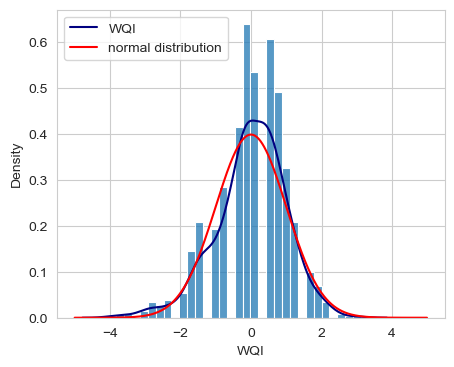

In [53]:
normal_test(df3,"WQI")

KS-Test P-value 1 sample: 0.00013615421043197985
P value < 0.05 => Non-Normal distribution


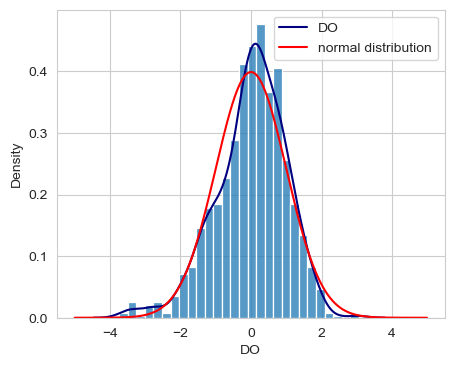

In [54]:
normal_test(df3,"DO")

In [55]:
# for col in df3.columns:
#     normal_test(df3,col)

In [56]:
# sns.pairplot(df1)

In [57]:
pvalues = [stats.ks_1samp(df3[col],stats.norm.cdf).pvalue for col in numeric_columns]

In [58]:
df_normres = pd.DataFrame({'Columns' : numeric_columns,
                           'Pvalue'  : pvalues})
df_normres['isNorm'] = df_normres['Pvalue'].apply(lambda p: p>0.05)

In [59]:
df_normres

,Columns,Pvalue,isNorm
0,Nhiệt độ,6.779367e-04,False
1,pH,6.903349e-05,False
2,Độ mặn,1.431068e-04,False
3,TDS,1.755625e-09,False
4,Độ đục,9.915581e-18,False
5,DO,1.379475e-04,False
6,Độ màu,4.220093e-07,False
7,Độ trong,1.084863e-20,False
8,Độ kiềm,1.286976e-03,False
9,Độ cứng,1.043516e-22,False


In [60]:
df3['Thay nước (cm)']

0      -0.490731
1      -0.490731
2      -0.490731
3       0.513234
4      -0.490731
          ...   
1155   -0.490731
1156   -0.490731
1157   -0.490731
1158   -0.490731
1159   -0.490731
Name: Thay nước (cm), Length: 1160, dtype: float64

# Correlation

In [61]:
cols = ['Silica', 'Canxi', 'Kali', 'Magie', 'Tuổi tôm', 'Mực nước',
       'Thay nước (cm)','WQI']

In [62]:
# corr = df3.corr(method='pearson')
# sns.heatmap(corr[cols].drop(index=cols),
#             cmap='seismic',
#             annot=True,
#             annot_kws={'fontsize':'x-small'})
# plt.show()

In [63]:
# Chay Spearman các cột có phân phối không chuẩn
corr1 = df3.corr(method='spearman')
pd.set_option('display.max_columns', None)
corr1

,Nhiệt độ,pH,Độ mặn,TDS,Độ đục,DO,Độ màu,Độ trong,Độ kiềm,Độ cứng,Amoni,Nitrat,Nitrit,Phosphate (PO43-),Silica,Canxi,Kali,Magie,Tuổi tôm,Mực nước,Thay nước (cm),WQI
Nhiệt độ,1.000000,-0.209981,-0.302313,-0.270013,0.263864,-0.437985,0.215911,-0.194315,-0.070561,-0.219945,0.098009,0.082057,0.027071,0.165607,0.308436,0.054283,-0.060397,-0.084026,-0.067330,-0.324353,-0.039663,0.066174
pH,-0.209981,1.000000,0.329690,0.291786,-0.110338,0.738810,-0.447014,0.068539,0.347145,0.342039,-0.339867,-0.405430,-0.439536,-0.291548,-0.437110,-0.221330,-0.159871,-0.108595,-0.473644,0.252974,0.007228,0.324272
Độ mặn,-0.302313,0.329690,1.000000,0.944412,-0.334340,0.402332,-0.020782,0.350704,0.176689,0.668666,-0.302491,-0.478328,-0.550288,-0.358528,-0.412385,0.044176,0.130602,0.166277,-0.377183,0.417600,0.010320,-0.015669
TDS,-0.270013,0.291786,0.944412,1.000000,-0.332914,0.378308,0.019051,0.337396,0.184021,0.665810,-0.298848,-0.461233,-0.546679,-0.364753,-0.385905,0.048423,0.140736,0.173399,-0.366321,0.394490,-0.000340,-0.006748
Độ đục,0.263864,-0.110338,-0.334340,-0.332914,1.000000,-0.251610,0.234675,-0.423431,-0.025019,-0.238998,0.214109,0.224327,0.262480,0.142955,0.159552,-0.090902,-0.137800,-0.121084,0.321743,-0.167205,0.080565,-0.101780
DO,-0.437985,0.738810,0.402332,0.378308,-0.251610,1.000000,-0.396198,0.191614,0.153834,0.330515,-0.416011,-0.346480,-0.381889,-0.341239,-0.473974,-0.072518,-0.020221,-0.006132,-0.333789,0.307948,0.037816,0.203254
Độ màu,0.215911,-0.447014,-0.020782,0.019051,0.234675,-0.396198,1.000000,-0.197525,-0.084588,-0.040687,0.167990,0.020180,0.084455,0.087306,0.327747,0.132495,0.118220,0.040086,0.120778,-0.253477,-0.007000,-0.165389
Độ trong,-0.194315,0.068539,0.350704,0.337396,-0.423431,0.191614,-0.197525,1.000000,0.076309,0.299262,-0.260303,-0.263852,-0.321536,-0.122219,-0.165404,0.121066,0.194402,0.156317,-0.243437,0.107558,-0.033152,0.243800
Độ kiềm,-0.070561,0.347145,0.176689,0.184021,-0.025019,0.153834,-0.084588,0.076309,1.000000,0.275663,0.073534,-0.212137,-0.300201,-0.057650,-0.096252,-0.149780,-0.066994,-0.071070,-0.398137,0.084776,-0.037391,0.383827
Độ cứng,-0.219945,0.342039,0.668666,0.665810,-0.238998,0.330515,-0.040687,0.299262,0.275663,1.000000,-0.249782,-0.498429,-0.564039,-0.427838,-0.490291,-0.053988,0.006578,0.125337,-0.318406,0.292369,0.022674,0.427553


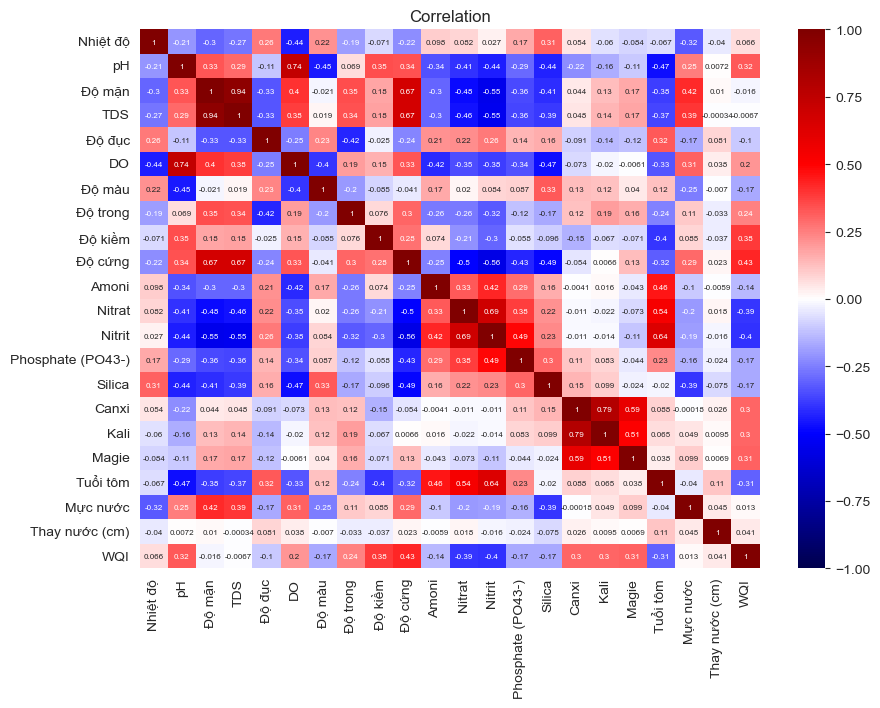

In [64]:
fig = plt.figure(figsize=(10,7))
sns.heatmap(corr1,
            cmap='seismic',
            vmin=-1,
            vmax=1,
            annot=True,
            annot_kws={'fontsize':'xx-small'})
plt.title('Correlation')
plt.show()

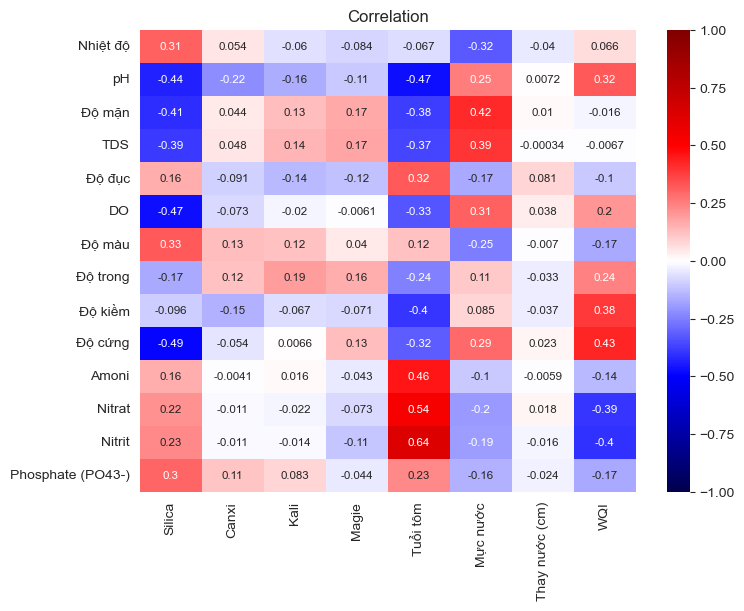

In [65]:
fig = plt.figure(figsize=(8,6))
sns.heatmap(corr1[cols].drop(index=cols),
            cmap='seismic',
            annot=True,
            vmin=-1,vmax=1,
            annot_kws={'fontsize':'small'})
plt.title('Correlation')
plt.show()

In [66]:
cols = [
       'Nhiệt độ', 'pH', 'Độ mặn', 'TDS', 'Độ đục', 'DO', 'Độ màu',
       'Độ kiềm', 'Độ cứng', 'TAN', 'Nitrat', 'Nitrit', 'Phosphate (PO43-)',
       'Silica', 'Canxi', 'Kali', 'Magie', 'WQI'
]
df_1perday = df3.rename(columns={'Amoni':'TAN'})[cols]
df_1perday.head()
corr_1perday = df_1perday.corr()

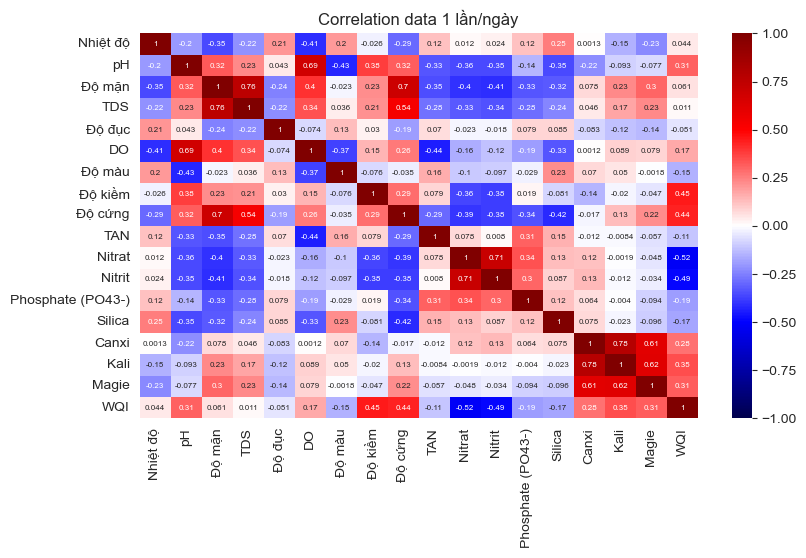

In [67]:
fig = plt.figure(figsize=[9,5])
sns.heatmap(corr_1perday,
            cmap='seismic',
            vmax=1,
            vmin=-1,
            annot=True,
            annot_kws={'fontsize':'xx-small'})
plt.title('Correlation data 1 lần/ngày')
plt.show()

### Thay nước

In [68]:
df1['module_name'].value_counts()

module_name
A1     278
A13    214
A2     163
A14    140
B4     137
B5     130
B11    117
Name: count, dtype: int64

In [69]:
wqi_gap = df3.iloc[1]

In [70]:
s = corr1.unstack()
so = s.sort_values(ascending=False)

In [71]:
so[22:40:2]

TDS       Độ mặn     0.944412
Kali      Canxi      0.794437
DO        pH         0.738810
Nitrat    Nitrit     0.691655
Độ mặn    Độ cứng    0.668666
Độ cứng   TDS        0.665810
Tuổi tôm  Nitrit     0.635932
Magie     Canxi      0.588232
Tuổi tôm  Nitrat     0.537999
dtype: float64

In [72]:
so[-1:-15:-2]

Nitrit   Độ cứng   -0.564039
Độ mặn   Nitrit    -0.550288
TDS      Nitrit    -0.546679
Nitrat   Độ cứng   -0.498429
Độ cứng  Silica    -0.490291
Nitrat   Độ mặn    -0.478328
DO       Silica    -0.473974
dtype: float64

In [73]:
top_corr = pd.concat([so[22:40:2],so[-1:-15:-2]])

In [74]:
len(top_corr)

16

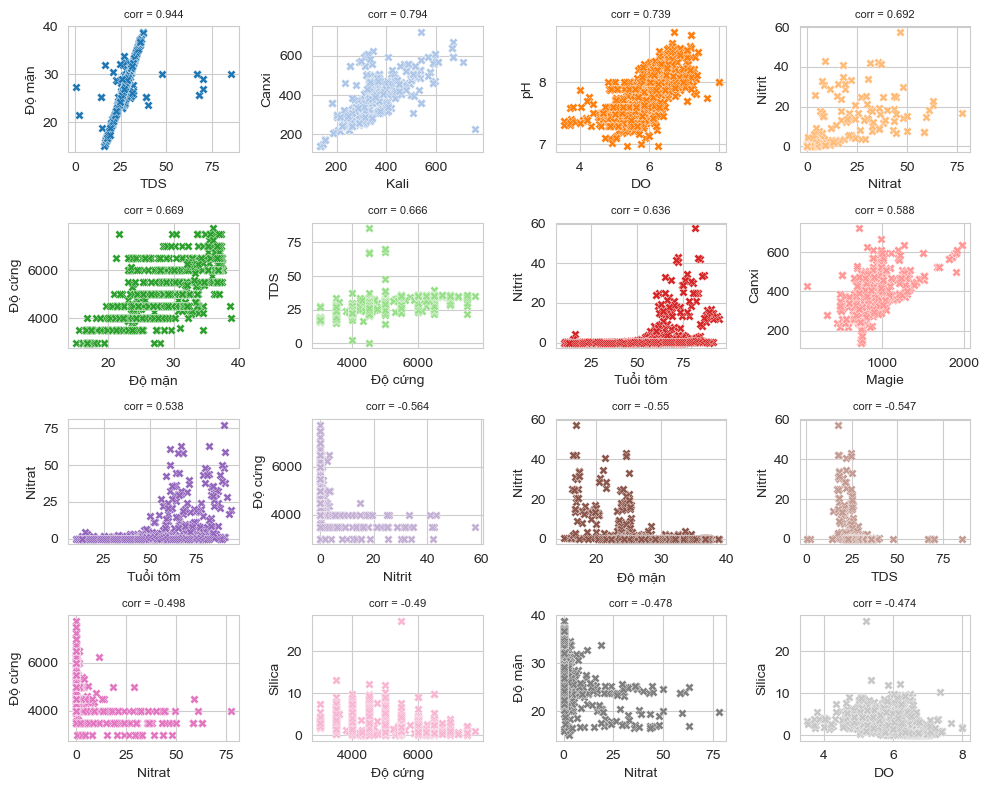

In [75]:
# Scatter plot between collums has high correlation.
fig = plt.figure(figsize=(10,8))
sns.set_style('whitegrid')

for i,pair in enumerate(list(top_corr.index)):
    plt.subplot(4,4,i+1)
    ax = sns.scatterplot(df2,x=pair[0],y=pair[1],
                    linewidth=0.2,
                    color=matplotlib.cm.tab20.colors[i],
                    marker='X')
    ax.set_title(f"corr = {top_corr[i]:3.3}",fontdict={'fontsize':8})    
plt.tight_layout()

In [76]:
wqicorr = pd.DataFrame(corr1.WQI.sort_values())
wqicorr

,WQI
Nitrit,-0.404177
Nitrat,-0.391010
Tuổi tôm,-0.305329
Phosphate (PO43-),-0.171164
Silica,-0.170546
Độ màu,-0.165389
Amoni,-0.137446
Độ đục,-0.101780
Độ mặn,-0.015669
TDS,-0.006748


In [77]:
wqicorr_high = pd.concat([wqicorr[0:3],wqicorr[-2:-5:-1]])
wqicorr_high

,WQI
Nitrit,-0.404177
Nitrat,-0.391010
Tuổi tôm,-0.305329
Độ cứng,0.427553
Độ kiềm,0.383827
pH,0.324272


In [78]:
wqicorr_high.iloc[0].values[0]

-0.40417715165893864

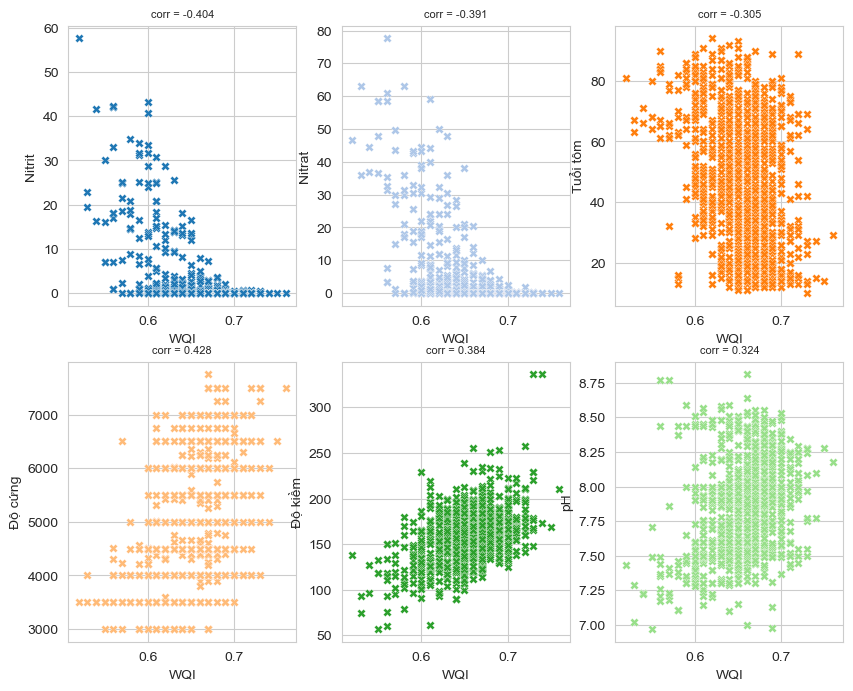

In [79]:
fig = plt.figure(figsize=(10,8))
sns.set_style('whitegrid')

for i,col in enumerate(list(wqicorr_high.index)):
    plt.subplot(2,3,i+1)
    ax = sns.scatterplot(df2,x='WQI',y=col,
                    linewidth=0.2,
                    color=matplotlib.cm.tab20.colors[i],
                    marker='X')
    ax.set_title(f"corr = {wqicorr_high.iloc[i].values[0]:3.3}",fontdict={'fontsize':8}) 

# Data 4 lần / ngày

### Correlation

In [80]:
df_4perday = pd.read_csv('../dataset/data_4perday.csv')

In [81]:
df_4perday.head()

,Date,Vụ nuôi,module_name,ao,Loại ao,Công nghệ nuôi,area,Giống tôm,Tuổi tôm,Time,Mực nước,Thay nước (cm),Nhiệt độ,pH,Độ mặn,TDS,Độ đục,DO,Độ màu,Độ trong,Độ kiềm,Độ cứng,Amoni,Nitrat,Nitrit,Phosphate (PO43-),Silica
0,27/9/2022,Vụ 2-2022,B11,D4N4,Circle,"two period, grow, exchange water",834,Vietuc,84.0,8.0,80.0,0.0,27.392712,7.542784,25.581104,25.655354,138.3,5.944577,594.0,21.1,145.0,5000.0,5.80,29.1,3.42,1.08,3.05
1,27/9/2022,Vụ 2-2022,B11,D4N4,Circle,"two period, grow, exchange water",834,Vietuc,84.0,11.5,80.0,0.0,27.336632,7.598080,25.279112,25.383263,147.8,5.955771,574.0,17.4,148.0,4500.0,8.60,22.4,3.54,1.34,2.25
2,26/9/2022,Vụ 2-2022,B11,D4N4,Circle,"two period, grow, exchange water",834,Vietuc,83.0,8.0,100.0,0.0,27.746788,7.591592,21.179304,21.633310,113.8,5.896505,499.0,19.0,147.0,4500.0,9.45,14.1,2.76,3.34,3.40
3,26/9/2022,Vụ 2-2022,B11,D4N4,Circle,"two period, grow, exchange water",834,Vietuc,83.0,11.5,100.0,0.0,28.897636,7.519950,25.781769,25.822426,139.3,5.848557,500.0,20.0,144.0,4500.0,9.30,12.5,2.46,2.80,4.00
4,26/9/2022,Vụ 2-2022,B11,D4N4,Circle,"two period, grow, exchange water",834,Vietuc,83.0,14.0,100.0,0.0,29.813780,7.662812,25.774549,25.809416,160.5,5.791039,594.0,20.0,151.0,4500.0,6.30,19.9,2.66,3.38,3.55


In [82]:
df_4perday.columns

Index(['Date', 'Vụ nuôi', 'module_name', 'ao', 'Loại ao', 'Công nghệ nuôi',
       'area', 'Giống tôm', 'Tuổi tôm', 'Time', 'Mực nước', 'Thay nước (cm)',
       'Nhiệt độ', 'pH', 'Độ mặn', 'TDS', 'Độ đục', 'DO', 'Độ màu', 'Độ trong',
       'Độ kiềm', 'Độ cứng', 'Amoni', 'Nitrat', 'Nitrit', 'Phosphate (PO43-)',
       'Silica'],
      dtype='object')

In [83]:
df_4perday.dropna(inplace=True)

In [84]:
print("Data count by time(hour) (4 times/day)")
pd.DataFrame(df_4perday['Time'].value_counts().sort_index()).transpose().head()

Data count by time(hour) (4 times/day)


Time,6.0,8.0,10.0,11.5,13.0,14.0,17.0,18.0
count,2,1116,2,725,2,900,718,6


In [85]:
cols = [
       'Nhiệt độ', 'pH', 'Độ mặn', 'TDS', 'Độ đục', 'DO', 'Độ màu',
       'Độ kiềm', 'Độ cứng', 'TAN', 'Nitrat', 'Nitrit', 'Phosphate (PO43-)',
       'Silica'
]

In [86]:
df_4perday = df_4perday.rename(columns={'Amoni':'TAN'})[cols]

In [87]:
corr_4perday = df_4perday.corr()


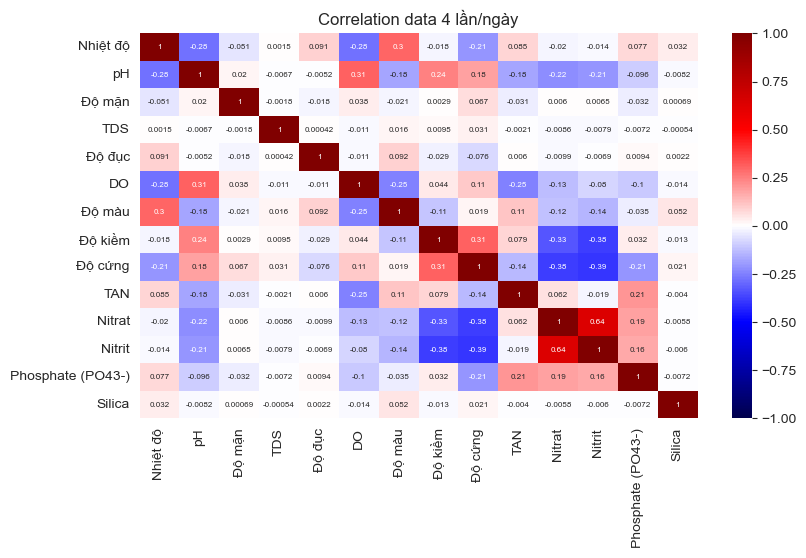

In [88]:
fig = plt.figure(figsize=[9,5])
sns.heatmap(corr_4perday,
            cmap='seismic',
            vmax=1,
            vmin=-1,
            annot=True,
            annot_kws={'fontsize':'xx-small'})
plt.title('Correlation data 4 lần/ngày')
plt.show()